In [127]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn import linear_model
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [128]:
df = pd.read_fwf(r'/content/data.csv', header=None)
df.head()


,0
0,61.101;17.592
1,55.277;91.302
2,85.186;13.662
3,70.032;11.854
4,58.598;68.233


Population : Independant Variable 
Profit : Dependant Variable

In [129]:
header_list = ["Population", "profit"]
data =  pd.read_csv(r'/content/ex1data1.txt',sep = ",",names=header_list, header = None)

In [130]:
print(data.head())
print(data.shape)

   Population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
(97, 2)


In [131]:
print(data.profit)

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: profit, Length: 97, dtype: float64


**Linear regression**
Y = mx + b
 

1.   m - slope
2.   b - intercept

**Since its a 2 Dimensional Space our Hyperplane would be a straight line **

Identification of liner relationship between population and profit
We try to find the best fit linear line whih describes the relationship between dependent and independant variable such that it minimizes the loss( diffrence between the actual and predicted value )

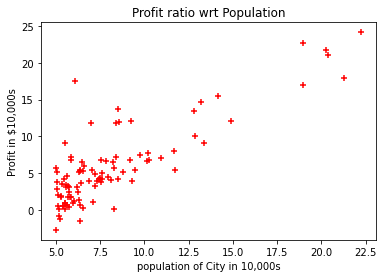

In [132]:
plt.title('Profit ratio wrt Population')  
plt.xlabel('population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.scatter(data.Population , data.profit , color = 'red',marker = '+')


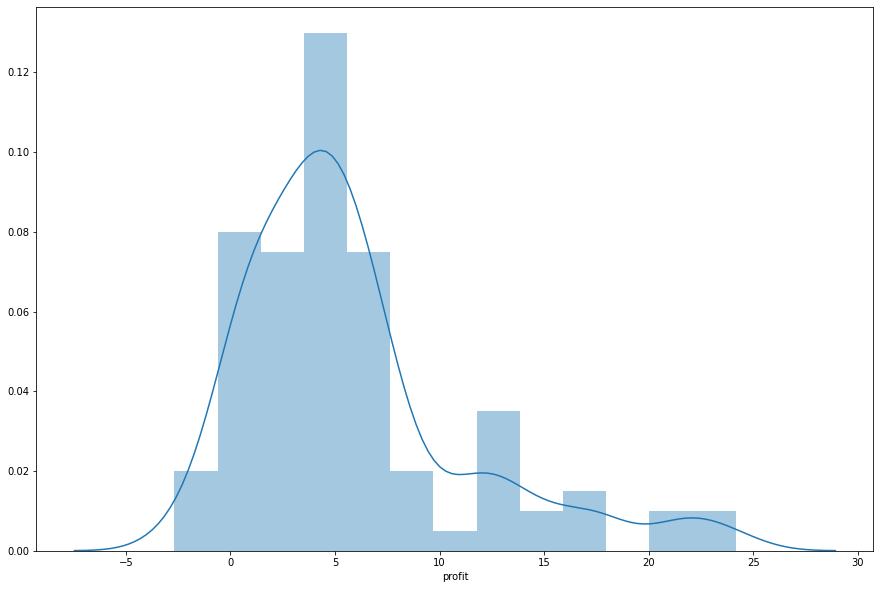

In [133]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['profit'])

In [134]:
# Garbage

print( len(data.Population))
x = data.Population
y = data.profit
#print( X )
print( y)

97
0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: profit, Length: 97, dtype: float64


**Find the line which least reduces the errors**

Model Build 

In [137]:
#reg = linear_model.LinearRegression()
#reg.fit(data[['Population']], data.profit)

m = 0 
c = 0 
L = 0.001
epochs = 1000                                                 #no of iterations ( as we choose smaller value of learning rate we have to increase the epoch for better convergence)
n = len(data.Population)

for i in range(epochs):
  predicted_value = m*x + c
  error = y -predicted_value
  Derivative_m = (-2/n)  * sum(x * ( error))    #Step 3
  Derivative_c = (-2/n)  * sum(error)           #Step 3
  m = m - L * Derivative_m                                    #step3 ( Updating the values of m )
  c = m - L * Derivative_c                                    #step3 (updating the values of c)
  print(m,c)
print('Optimal Values of the Slope and Intercept')
print(m,c)


0.13065769949111344 0.14233596959420622
0.2377204290955638 0.24698174586685298
0.325644724851366 0.3329495291480571
0.3978512920823814 0.40354927147549374
0.45714990121800814 0.4615282988318823
0.5058480346437808 0.5091427446212924
0.5458406792221832 0.5482454262498607
0.5786840657723533 0.580357943474312
0.6056562265648014 0.6067298883011671
0.6278067272965815 0.628387470268025
0.6459975087635954 0.6461734492593628
0.6609364274990035 0.6607799297595592
0.6732048005421194 0.6727752926634804
0.6832800261853453 0.682626312640184
0.6915541609385985 0.6907163217010766
0.6983491755952697 0.6973601257701068
0.7039294840578825 0.7028162547033905
0.7085122324567157 0.7072970224423707
0.7122757489411028 0.7109767887705102
0.7153664829495113 0.7139987441626439
0.717904703985705 0.7164804817453297
0.7199891816570442 0.7185185731894812
0.7217010290889082 0.7201923265966518
0.7231068592737415 0.7215668726093216
0.724261377177499 0.7226956988347695
0.7252095084699387 0.723622731204376
0.725988147713

#Prediction

In [ ]:
predicted_value = m*x + c
plt.title('Profit ratio wrt Population')  
plt.scatter(x, y , marker= '+') 
#plt.scatter(x,predicted_value)
plt.plot([min(x), max(x)], [min(predicted_value), max(predicted_value)], color='red')  # regression line
plt.show()

In [ ]:
X = data['Population'].values.reshape(-1,1)
Y = data['profit'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)